**Подгрузим необходимые библиотеки. Поскольку нам нужен будет график корреляции, то подгрузим еще и нампай, и матплотлиб**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Подключим данные**. Узнаем, где находится наша рабочая директория, так как будем качать данные с Kaggle/

In [2]:
import pathlib
from pathlib import Path
work_path = pathlib.Path.cwd()
print(work_path)

C:\Users\adamo


In [3]:
netflix = pd.read_csv(
"C:\\Users\\adamo\\Downloads\\Netflix subscription fee Dec-2021.csv", delimiter=','
)

In [4]:
netflix

,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
0,ar,Argentina,4760,3154,1606,3.74,6.30,9.26
1,au,Australia,6114,4050,2064,7.84,12.12,16.39
2,at,Austria,5640,3779,1861,9.03,14.67,20.32
3,be,Belgium,4990,3374,1616,10.16,15.24,20.32
4,bo,Bolivia,4991,3155,1836,7.99,10.99,13.99
...,...,...,...,...,...,...,...,...
60,ua,Ukraine,5336,3261,2075,5.64,8.46,11.29
61,gb,United Kingdom,6643,4551,2092,7.91,13.20,18.48
62,us,United States,5818,3826,1992,8.99,13.99,17.99
63,uy,Uruguay,4989,3154,1835,8.99,12.99,15.99


Нам придётся сравнивать цены на подписки в разрез континентов, валют. Поэтому подргузим еще dataframe, которые будем мерджить к датафрейму netflix по атрибуту Country. * - dataframe,содержащие информаицию о расположении страны, её валюте и среднемесячного дохода.

In [5]:
wages = pd.read_excel(
"C:\\Users\\adamo\\Downloads\\chanda228.xlsx"
)

In [6]:
wages.head(3)

,Country,Median Income,Mean Income,GDP Per Capita (PPP),2021 Population
0,Luxembourg,26321.0,2614.666667,12459.0,634814
1,United Arab Emirates,24292.0,2251.416667,70089.0,9991089
2,Norway,22684.0,2106.000000,70005.0,5465630


In [7]:
wages.head(2)

,Country,Median Income,Mean Income,GDP Per Capita (PPP),2021 Population
0,Luxembourg,26321.0,2614.666667,12459.0,634814
1,United Arab Emirates,24292.0,2251.416667,70089.0,9991089


In [8]:
continents_data = pd.read_html('https://statisticstimes.com/geography/countries-by-continents.php', attrs = {'id':'table_id'})

In [9]:
continents = continents_data[0]

In [10]:
display(continents)

,No,Country or Area,ISO-alpha3 Code,M49 Code,Region 1,Region 2,Continent
0,1,Afghanistan,AFG,4,Southern Asia,NaN,Asia
1,2,Åland Islands,ALA,248,Northern Europe,NaN,Europe
2,3,Albania,ALB,8,Southern Europe,NaN,Europe
3,4,Algeria,DZA,12,Northern Africa,NaN,Africa
4,5,American Samoa,ASM,16,Polynesia,NaN,Oceania
...,...,...,...,...,...,...,...
244,245,Wallis and Futuna Islands,WLF,876,Polynesia,NaN,Oceania
245,246,Western Sahara,ESH,732,Northern Africa,NaN,Africa
246,247,Yemen,YEM,887,Western Asia,NaN,Asia
247,248,Zambia,ZMB,894,Eastern Africa,Sub-Saharan Africa,Africa


In [11]:
currency = pd.read_csv('https://docs.google.com/spreadsheets/d/1BXA8J0NF8x8oX_zduQ-5WOZRRmuGRlA8tWckhwig7fc/export?gid=0&format=csv')

In [12]:
currency.tail(4)

,Country,Currency
61,Denmark,DKK
62,San Marino,EUR
63,Croatia,EUR
64,Liechtenstein,CHF


**Чистка данных**

In [13]:
wages.columns

Index(['Country', 'Median Income ', 'Mean Income', 'GDP Per Capita (PPP)',
       '2021 Population'],
      dtype='object')

In [14]:
wages.isnull().sum()

Country                 0
Median Income           2
Mean Income             0
GDP Per Capita (PPP)    4
2021 Population         0
dtype: int64

In [15]:
#wages['Median Income'] #Почему-то не дропнулось

In [16]:
wages = wages.drop(columns=['GDP Per Capita (PPP)',
       '2021 Population'])

In [17]:
wages = wages[['Country', 'Mean Income']]

In [18]:
continents = continents.rename(columns={'Country or Area': 'Country'})

На просторах интернета был найден с трудом данный датасет, содержащий информацию о среднемесячных доходах жителей. Конечно же, раз в исходном датасете Нетфликса указана цена месячной подписки, то будет во внимание приниматься именно месячный доход жителей по старнам. *Валюта для всех стран указана в долларах.

Исполним джоин для данных сетов. К сожалению, у нас пропадут несколько значений и с позиции начинающего аналитика имело бы смысл понять, почему они пропали. Однако прошу меня простить, в будущем такого я никогда не сделаю (((

In [19]:
data1 = netflix.merge(wages, how='left',left_on='Country',right_on='Country')

In [20]:
data1

,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),Mean Income
0,ar,Argentina,4760,3154,1606,3.74,6.30,9.26,577.916667
1,au,Australia,6114,4050,2064,7.84,12.12,16.39,1777.416667
2,at,Austria,5640,3779,1861,9.03,14.67,20.32,1726.500000
3,be,Belgium,4990,3374,1616,10.16,15.24,20.32,1493.083333
4,bo,Bolivia,4991,3155,1836,7.99,10.99,13.99,398.916667
...,...,...,...,...,...,...,...,...,...
60,ua,Ukraine,5336,3261,2075,5.64,8.46,11.29,41.750000
61,gb,United Kingdom,6643,4551,2092,7.91,13.20,18.48,1511.083333
62,us,United States,5818,3826,1992,8.99,13.99,17.99,2111.000000
63,uy,Uruguay,4989,3154,1835,8.99,12.99,15.99,824.000000


In [21]:
display(data1[data1['Mean Income'].isna()])

,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),Mean Income
12,cz,Czechia,7325,5234,2091,8.83,11.49,14.15,NaN
19,gi,Gibraltar,6167,4079,2088,9.03,14.67,20.32,NaN
23,hk,Hong Kong,4746,2883,1863,8.08,10.00,11.93,NaN
27,id,Indonesia,3887,2449,1438,8.36,10.66,12.96,NaN
33,li,Liechtenstein,3048,1712,1336,12.88,20.46,26.96,NaN
38,mc,Monaco,5804,3806,1998,9.03,13.54,18.06,NaN
40,nz,New Zealand,6084,4003,2081,8.80,12.53,16.94,NaN
49,sm,San Marino,2310,1937,373,9.03,14.67,20.32,NaN
50,sg,Singapore,6303,4109,2194,9.51,12.81,16.11,NaN


In [22]:
add_wages_url = 'https://docs.google.com/spreadsheets/d/1pYbIvbIb7BvjC0pd7BYRfRZzUQFLYf_raqoAo8SDDNg/export?gid=0&format=csv'

In [23]:
add_wages= pd.read_excel(
"C:\\Users\\adamo\\Downloads\\Новая таблица.xlsx", delimiter=','
)


In [24]:
add_wages = add_wages.rename(columns={'Wages': 'Mean Income'})

In [25]:
wages_full= pd.concat([
    wages, 
    add_wages
])

wages_full

,Country,Mean Income
0,Luxembourg,2614.666667
1,United Arab Emirates,2251.416667
2,Norway,2106.000000
3,Switzerland,2148.916667
4,United States,2111.000000
...,...,...
4,Monaco,5720.800000
5,Indonesia,735.000000
6,San Marino,2466.710000
7,New Zealand,3576.320000


In [26]:
# netflix+wages
n_w = netflix.merge(wages_full,how='left',left_on='Country',right_on='Country')

In [27]:
display(n_w[n_w['Mean Income'].isna()])

,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),Mean Income


In [28]:
# netflix+wages+continent
n_w_c = n_w.merge(continents,how='left',left_on='Country',right_on='Country')

In [29]:
display(n_w_c[n_w_c['Continent'].isna()])

,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),Mean Income,No,ISO-alpha3 Code,M49 Code,Region 1,Region 2,Continent
4,bo,Bolivia,4991,3155,1836,7.99,10.99,13.99,398.916667,NaN,NaN,NaN,NaN,NaN,NaN
23,hk,Hong Kong,4746,2883,1863,8.08,10.00,11.93,2015.260000,NaN,NaN,NaN,NaN,NaN,NaN
37,md,Moldova,3937,2473,1464,9.03,11.29,13.54,29.916667,NaN,NaN,NaN,NaN,NaN,NaN
48,ru,Russia,5711,3624,2087,8.13,10.84,13.56,606.250000,NaN,NaN,NaN,NaN,NaN,NaN
53,kr,South Korea,5195,3334,1861,8.07,11.47,14.45,1193.000000,NaN,NaN,NaN,NaN,NaN,NaN
57,tw,Taiwan,5105,3134,1971,9.74,11.90,14.07,1362.916667,NaN,NaN,NaN,NaN,NaN,NaN
61,gb,United Kingdom,6643,4551,2092,7.91,13.20,18.48,1511.083333,NaN,NaN,NaN,NaN,NaN,NaN
62,us,United States,5818,3826,1992,8.99,13.99,17.99,2111.000000,NaN,NaN,NaN,NaN,NaN,NaN
64,ve,Venezuela,4797,3154,1643,7.99,10.99,13.99,311.750000,NaN,NaN,NaN,NaN,NaN,NaN


Есть NaN поэтому опять подтягиваем таблицы.

In [30]:
continent_url = 'https://docs.google.com/spreadsheets/d/1KneyeNaKjcx8U4ZzxxW1ibYhtXyaIeAewoH3Gv1ZEHI/export?gid=0&format=csv'

In [31]:
add_continent = pd.read_csv(continent_url)

In [32]:
add_continent = add_continent.rename(columns={'country': 'Country', 'continent': 'Continent' })

In [33]:
continent1 = pd.concat([
    continents,
    add_continent
])

continent1 =  continent1.drop(columns=['No',
       'ISO-alpha3 Code', 'M49 Code', 'Region 1', 'Region 2' ])
continent1

,Country,Continent
0,Afghanistan,Asia
1,Åland Islands,Europe
2,Albania,Europe
3,Algeria,Africa
4,American Samoa,Oceania
...,...,...
4,South Korea,Asia
5,Taiwan,Asia
6,United Kingdom,Europe
7,United States,North America


In [34]:
n_w_c = n_w.merge(continent1,how='left',left_on='Country',right_on='Country')

In [35]:
display(n_w_c[n_w_c['Continent'].isna()])

,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),Mean Income,Continent


In [36]:
# netflix+wages+continent + currency
n_w_c_c= n_w_c.merge(currency ,how='left',left_on='Country',right_on='Country')

In [37]:
n_w_c_c.head(5)

,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),Mean Income,Continent,Currency
0,ar,Argentina,4760,3154,1606,3.74,6.30,9.26,577.916667,South America,ARS
1,au,Australia,6114,4050,2064,7.84,12.12,16.39,1777.416667,Oceania,AUD
2,at,Austria,5640,3779,1861,9.03,14.67,20.32,1726.500000,Europe,EUR
3,be,Belgium,4990,3374,1616,10.16,15.24,20.32,1493.083333,Europe,EUR
4,bo,Bolivia,4991,3155,1836,7.99,10.99,13.99,398.916667,South America,USD


In [38]:
netflix = n_w_c_c

netflix это наш окончательный преобразованный датафрейм, над котороым можно уже проделать все последующие операции.

****EDA****

Найдём взаимозависимость между ценой подписки и среднемесячным доходом (корреляцию) и построим график линейной регрессии

In [39]:
netflix.head(7)

,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),Mean Income,Continent,Currency
0,ar,Argentina,4760,3154,1606,3.74,6.30,9.26,577.916667,South America,ARS
1,au,Australia,6114,4050,2064,7.84,12.12,16.39,1777.416667,Oceania,AUD
2,at,Austria,5640,3779,1861,9.03,14.67,20.32,1726.500000,Europe,EUR
3,be,Belgium,4990,3374,1616,10.16,15.24,20.32,1493.083333,Europe,EUR
4,bo,Bolivia,4991,3155,1836,7.99,10.99,13.99,398.916667,South America,USD
5,br,Brazil,4972,3162,1810,4.61,7.11,9.96,637.833333,South America,BRL
6,bg,Bulgaria,6797,4819,1978,9.03,11.29,13.54,622.833333,Europe,EUR


Удалим лишние атрибуты путем созданания нового датафрейма.

In [40]:
print(netflix['Cost Per Month - Basic ($)'].corr(netflix['Mean Income']))                    # Pearson's r
print(netflix['Mean Income'].corr(netflix['Cost Per Month - Basic ($)']))
print(netflix['Mean Income'].corr(netflix['Cost Per Month - Basic ($)'], method='spearman'))  # Spearman's rho
print(netflix['Mean Income'].corr(netflix['Cost Per Month - Basic ($)'], method='kendall'))  

0.43128230971883014
0.43128230971883
0.44799585240761575
0.3203917084750516


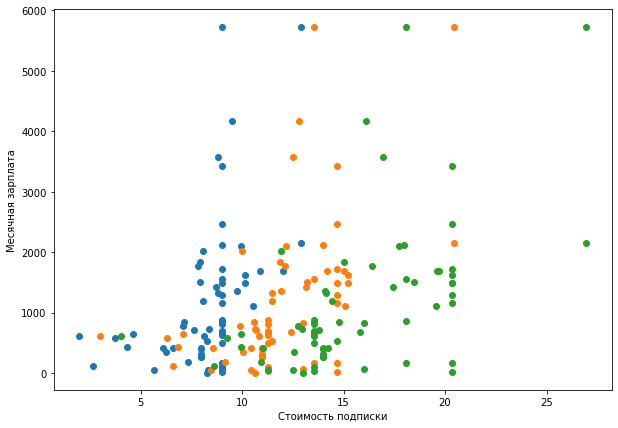

In [41]:
plt.figure(figsize=(10, 7))
plt.scatter(netflix['Cost Per Month - Basic ($)'], netflix['Mean Income'], marker='o', label='Basic');
plt.scatter(netflix['Cost Per Month - Standard ($)'], netflix['Mean Income'], marker='o', label='Standard');
plt.scatter(netflix['Cost Per Month - Premium ($)'], netflix['Mean Income'], marker='o',label='Premium');
plt.xlabel('Стоимость подписки')
plt.ylabel('Месячная зарплата')
plt.show()

Среднее цену подписки найдём через агрегатную функцию среднего, группируяю старны по валюте

In [42]:
display(netflix.groupby('Currency')['Cost Per Month - Basic ($)']
        .mean()
        .reset_index()
        .sort_values(by='Cost Per Month - Basic ($)',ascending=False)
        .head(5)
       )
display(netflix.groupby('Currency')['Cost Per Month - Premium ($)']
        .mean()
        .reset_index()
        .sort_values(by='Cost Per Month - Premium ($)',ascending=False)
        .head(5)
       )
display(netflix.groupby('Currency')['Cost Per Month - Standard ($)']
        .mean()
        .reset_index()
        .sort_values(by='Cost Per Month - Standard ($)',ascending=False)
        .head(5)
       )


,Currency,Cost Per Month - Basic ($)
4,CHF,12.88
8,DKK,12.00
26,SEK,10.90
14,ILS,10.56
20,NOK,9.94


,Currency,Cost Per Month - Premium ($)
4,CHF,26.96
26,SEK,19.70
8,DKK,19.60
14,ILS,19.54
10,GBP,18.48


,Currency,Cost Per Month - Standard ($)
4,CHF,20.46
14,ILS,15.05
8,DKK,15.04
26,SEK,14.20
10,GBP,13.20


С континетом работает та же аналонгия.

In [43]:
display(netflix.groupby('Continent')['Cost Per Month - Basic ($)']
        .mean()
        .reset_index()
        .sort_values(by='Cost Per Month - Basic ($)',ascending=False)
       )
display(netflix.groupby('Continent')['Cost Per Month - Standard ($)']
        .mean()
        .reset_index()
        .sort_values(by='Cost Per Month - Standard ($)',ascending=False)
       )
display(netflix.groupby('Continent')['Cost Per Month - Premium ($)']
        .mean()
        .reset_index()
        .sort_values(by='Cost Per Month - Premium ($)',ascending=False)
       )

,Continent,Cost Per Month - Basic ($)
2,Europe,9.230294
4,Oceania,8.320000
3,North America,8.081667
1,Asia,7.636667
5,South America,6.709000
0,Africa,6.260000


,Continent,Cost Per Month - Standard ($)
2,Europe,13.304412
4,Oceania,12.325000
3,North America,11.876667
1,Asia,10.404167
0,Africa,10.050000
5,South America,9.619000


,Continent,Cost Per Month - Premium ($)
2,Europe,17.545588
4,Oceania,16.665000
3,North America,15.205000
1,Asia,12.966667
0,Africa,12.580000
5,South America,12.555000


Относительную цену подпсики в Чехии найдём следующим образом:1) Выведем строку со значением атрибута Сountry = Чехия. Затем поделим цену каждой подписки на среднемесячный доход

In [44]:
netflix[netflix['Country'] == 'Czechia']

,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),Mean Income,Continent,Currency
12,cz,Czechia,7325,5234,2091,8.83,11.49,14.15,1328.08,Europe,CZK


In [45]:
'Basic/Mean Income for Czechia =',netflix[netflix['Country'] == 'Czechia']['Cost Per Month - Basic ($)'].values[0]/ \
       netflix[netflix['Country'] == 'Czechia']['Mean Income'].values[0]       

('Basic/Mean Income for Czechia =', 0.006648695861695079)

In [46]:
'Standard/Mean Income for Czechia =',netflix[netflix['Country'] == 'Czechia']['Cost Per Month - Standard ($)'].values[0]/ \
       netflix[netflix['Country'] == 'Czechia']['Mean Income'].values[0]

('Standard/Mean Income for Czechia =', 0.008651587253779893)

In [47]:
'Premium/Mean Income for Czechia =', netflix[netflix['Country'] == 'Czechia']['Cost Per Month - Premium ($)'].values[0]/ \
       netflix[netflix['Country'] == 'Czechia']['Mean Income'].values[0]     

('Premium/Mean Income for Czechia =', 0.010654478645864707)

Топ-5 стран с самой большой библиотекой сериалов

In [48]:
netflix[['Country','No. of TV Shows']].sort_values(by='No. of TV Shows',ascending=False).head(5)

,Country,No. of TV Shows
12,Czechia,5234
51,Slovakia,5055
6,Bulgaria,4819
24,Hungary,4802
61,United Kingdom,4551


Аналогично с Чехией проделаем ту же процендуру и для России

In [49]:
netflix[netflix['Country'] == 'Russia']

,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),Mean Income,Continent,Currency
48,ru,Russia,5711,3624,2087,8.13,10.84,13.56,606.25,Europe,RUB


In [50]:
'Basic/Mean Income for Русь-матушка =',netflix[netflix['Country'] == 'Russia']['Cost Per Month - Basic ($)'].values[0]/ \
       netflix[netflix['Country'] == 'Russia']['Mean Income'].values[0]

('Basic/Mean Income for Русь-матушка =', 0.013410309278350517)

In [51]:
'Standard/Mean Income for Русь-матушка =',netflix[netflix['Country'] == 'Russia']['Cost Per Month - Standard ($)'].values[0]/ \
       netflix[netflix['Country'] == 'Russia']['Mean Income'].values[0]

('Standard/Mean Income for Русь-матушка =', 0.01788041237113402)

In [52]:
'Premium/Mean Income for Русь-матушка =', netflix[netflix['Country'] == 'Russia']['Cost Per Month - Premium ($)'].values[0]/ \
       netflix[netflix['Country'] == 'Russia']['Mean Income'].values[0]

('Premium/Mean Income for Русь-матушка =', 0.022367010309278353)

Место России в эффектовности подписки

In [53]:
netflix['Cost_Per_Title_Basic'] = netflix['Cost Per Month - Basic ($)']/netflix['Total Library Size']

In [54]:
rank = netflix.sort_values(by='Cost_Per_Title_Basic',ascending=True).reset_index(drop=True)
display(rank[rank['Country'] == 'Russia'])

,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),Mean Income,Continent,Currency,Cost_Per_Title_Basic
25,ru,Russia,5711,3624,2087,8.13,10.84,13.56,606.25,Europe,RUB,0.001424


VPN лучше использовать там, где очень дорогая подписка. Причём дороговизна базовой подписки будет достаточным для этого условием

In [55]:
netflix.sort_values(by='Cost Per Month - Basic ($)',ascending=False).head(3)

,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),Mean Income,Continent,Currency,Cost_Per_Title_Basic
33,li,Liechtenstein,3048,1712,1336,12.88,20.46,26.96,5731.060000,Europe,CHF,0.004226
56,ch,Switzerland,5506,3654,1852,12.88,20.46,26.96,2148.916667,Europe,CHF,0.002339
13,dk,Denmark,4558,2978,1580,12.00,15.04,19.60,1692.000000,Europe,DKK,0.002633
